In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

#### Data ingestion

In [3]:
df = pd.read_csv('cubic_zirconia-1.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df = df.iloc[:,1::]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


#### Chcking data types

In [6]:
pd.DataFrame(df.dtypes, columns = ['Data Type'])

,Data Type
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
x,float64
y,float64
z,float64
price,int64


- cut, color and clarity are object while rest are float/int

#### Checking shape

In [7]:
print('Shape of data is',df.shape[0],'x',df.shape[1])

Shape of data is 26967 x 10


#### Checking duplicates

In [8]:
print('Duplicates:', df.duplicated().sum())

Duplicates: 34


In [9]:
df.drop_duplicates(inplace = True)
print('Duplicates:',df.duplicated().sum())
print('Shape:',df.shape[0],' x',df.shape[1])

Duplicates: 0
Shape: 26933  x 10


#### Checking for Null values

In [10]:
pd.DataFrame(df.isnull().sum(), columns = ['Missing values'])

,Missing values
carat,0
cut,0
color,0
clarity,0
depth,697
table,0
x,0
y,0
z,0
price,0


- 697 missing value in depth

#### Checking summary

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


- x,y,z are dimensions, can't be zero.
- Require imputation

In [13]:
df[df.x==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [14]:
df[df.y==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [15]:
df[df.z==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


- These data points need to be treated, that will be taken care in the next question

#### Performing EDA

#### Univariate analysis

In [16]:
def univariate(col):
    print('Description of',col,' is: -')
    print(df[col].describe())
    print(' ')
    print('-----------------------------------------------------------')
    print("Mean is: ", df[col].mean())
    print("Median is: ", df[col].median())
    print("Mode is: ", df[col].mode()[0])
    print('-----------------------------------------------------------')
    print(" ")
    
    print("Distribution of ", col, ' is: -')
    
    sns.displot(x = df[col], kde = True,height=3)
    plt.axvline(x = df[col].mean(), color = 'green',label = 'mean')
    plt.axvline(x = df[col].median(), color = 'red', label = 'median')
    plt.axvline(x = df[col].mode()[0], color = 'yellow', label = 'mode')
    plt.legend()
    plt.show()
    
    print('-----------------------------------------------------------')
    print(' ')
    print('Boxplot of',col,' is: -')
    plt.figure(figsize = (4,3))
    sns.boxplot(x = df[col],width = .6)
    plt.show()
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    print(' ')

Description of carat  is: -
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64
 
-----------------------------------------------------------
Mean is:  0.7980102476515696
Median is:  0.7
Mode is:  0.3
-----------------------------------------------------------
 
Distribution of  carat  is: -


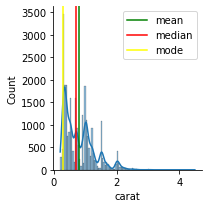

-----------------------------------------------------------
 
Boxplot of carat  is: -


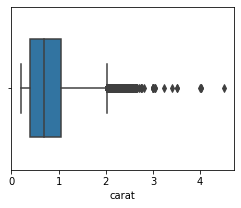

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of depth  is: -
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64
 
-----------------------------------------------------------
Mean is:  61.745285104437116
Median is:  61.8
Mode is:  62.0
-----------------------------------------------------------
 
Distribution of  depth  is: -


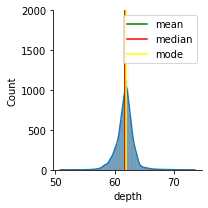

-----------------------------------------------------------
 
Boxplot of depth  is: -


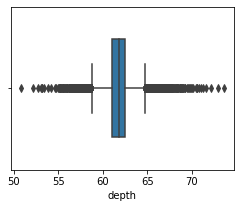

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of table  is: -
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64
 
-----------------------------------------------------------
Mean is:  57.45594994987559
Median is:  57.0
Mode is:  56.0
-----------------------------------------------------------
 
Distribution of  table  is: -


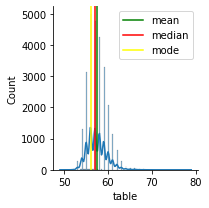

-----------------------------------------------------------
 
Boxplot of table  is: -


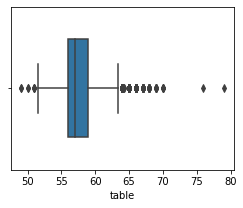

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of x  is: -
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64
 
-----------------------------------------------------------
Mean is:  5.729346155274198
Median is:  5.69
Mode is:  4.38
-----------------------------------------------------------
 
Distribution of  x  is: -


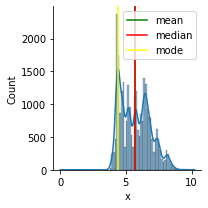

-----------------------------------------------------------
 
Boxplot of x  is: -


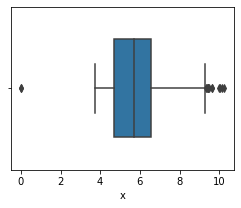

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of y  is: -
count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64
 
-----------------------------------------------------------
Mean is:  5.733101771061486
Median is:  5.7
Mode is:  4.35
-----------------------------------------------------------
 
Distribution of  y  is: -


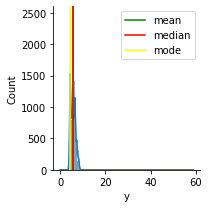

-----------------------------------------------------------
 
Boxplot of y  is: -


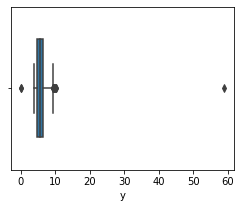

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of z  is: -
count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64
 
-----------------------------------------------------------
Mean is:  3.537769279322763
Median is:  3.52
Mode is:  2.69
-----------------------------------------------------------
 
Distribution of  z  is: -


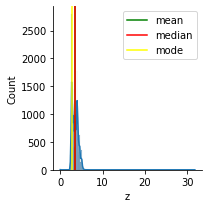

-----------------------------------------------------------
 
Boxplot of z  is: -


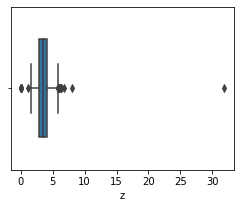

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of price  is: -
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64
 
-----------------------------------------------------------
Mean is:  3937.526120372777
Median is:  2375.0
Mode is:  544
-----------------------------------------------------------
 
Distribution of  price  is: -


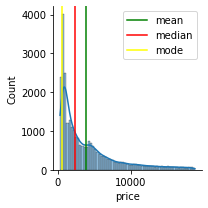

-----------------------------------------------------------
 
Boxplot of price  is: -


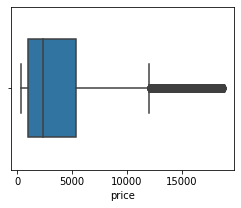

-----------------------------------------------------------
-----------------------------------------------------------
 


In [17]:
for i in df.columns:
    if(df[i].dtype!='object'):
        univariate(i)

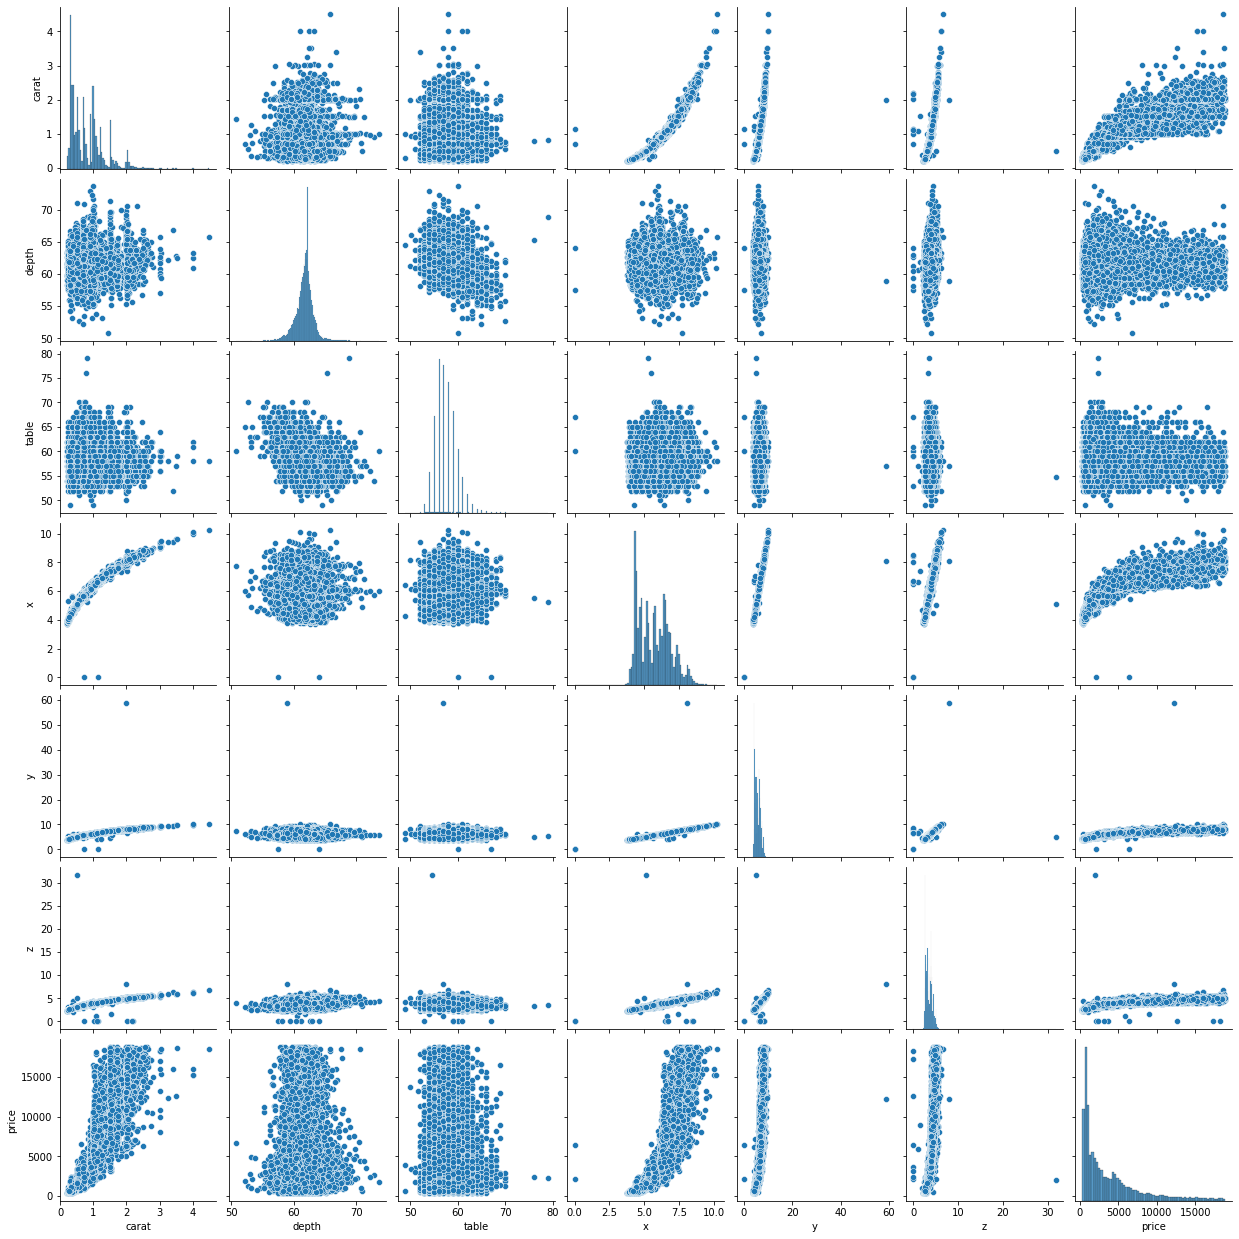

In [18]:
sns.pairplot(data = df);

#### Bivariate analysis

In [19]:
for i in df.columns:
    if(df[i].dtype=='object'):
        print('Unique values in column:',i.upper())
        print(df[i].value_counts())
        print('-------------------------------------')

Unique values in column: CUT
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
-------------------------------------
Unique values in column: COLOR
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
-------------------------------------
Unique values in column: CLARITY
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64
-------------------------------------


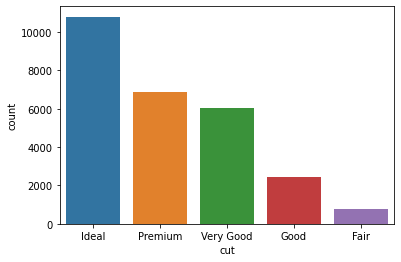

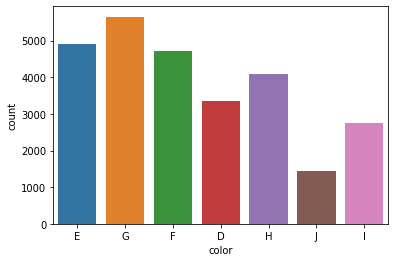

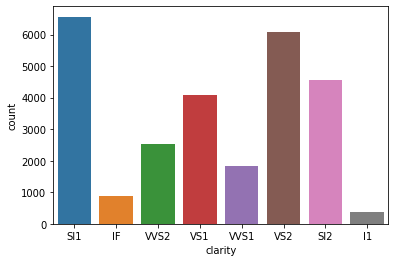

In [20]:
for i in df.columns:
    if(df[i].dtype =='object'):
        sns.countplot(x = df[i])
        plt.show()

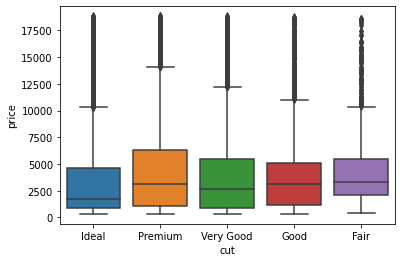

In [21]:
sns.boxplot(x = df.cut, y = df.price);

<AxesSubplot:xlabel='color', ylabel='price'>

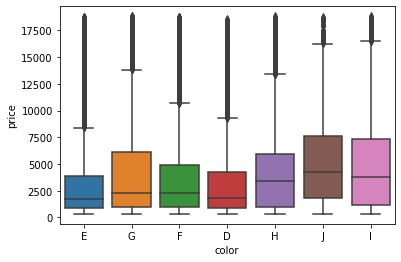

In [22]:
sns.boxplot(x = df.color, y = df.price)

Best to worst: D E F G H I J 

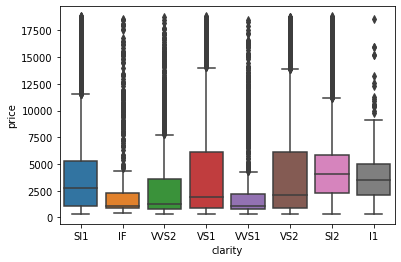

In [23]:
sns.boxplot(x = df.clarity, y = df.price);

FL IF VVS1 VVS2 VS1 VS2 SI1 SI2 I1 I2 I3

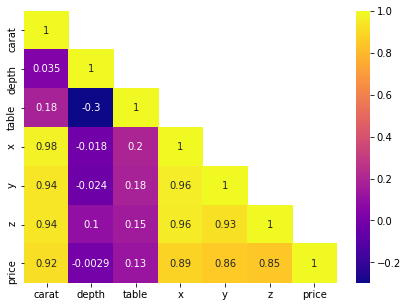

In [24]:
plt.figure(figsize = (7,5))
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df.corr(),mask = mask, annot = True, cmap = 'plasma');

#### Carat vs Price against cut color and clarity

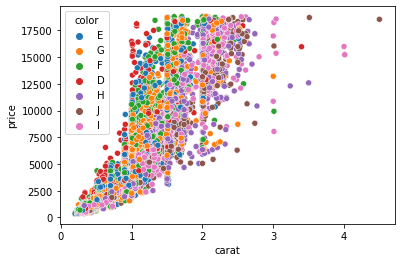

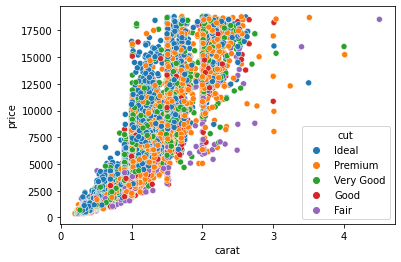

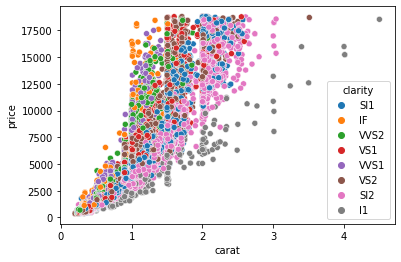

In [25]:
sns.scatterplot(x = df.carat, y = df.price, hue = df.color)
plt.show()
sns.scatterplot(x = df.carat, y = df.price, hue = df.cut)
plt.show()
sns.scatterplot(x = df.carat, y = df.price, hue = df.clarity)
plt.show()

#### x vs price

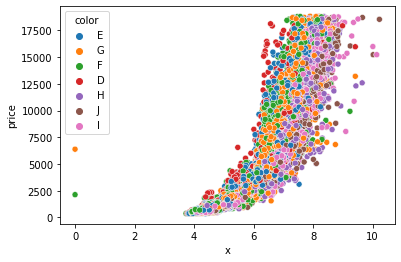

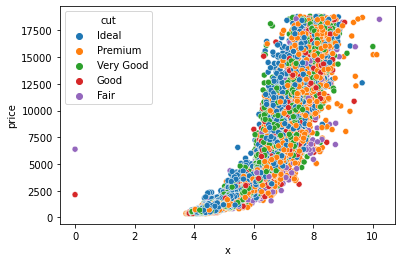

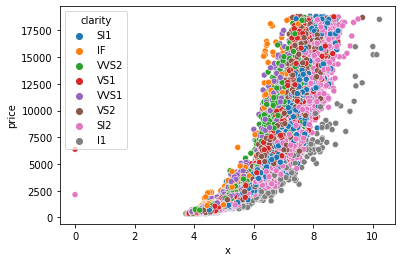

In [26]:
sns.scatterplot(x = df.x, y = df.price, hue = df.color)
plt.show()
sns.scatterplot(x = df.x, y = df.price, hue = df.cut)
plt.show()
sns.scatterplot(x = df.x, y = df.price, hue = df.clarity)
plt.show()

#### y vs price

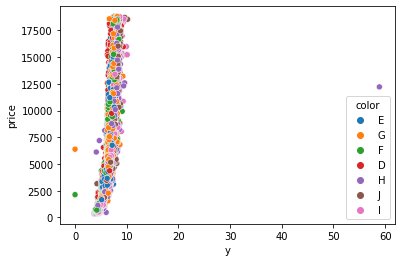

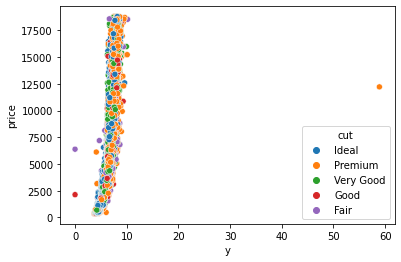

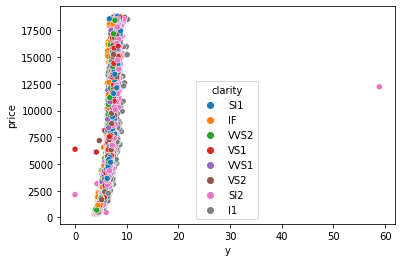

In [27]:
sns.scatterplot(x = df.y, y = df.price, hue = df.color)
plt.show()
sns.scatterplot(x = df.y, y = df.price, hue = df.cut)
plt.show()
sns.scatterplot(x = df.y, y = df.price, hue = df.clarity)
plt.show()

#### z vs price

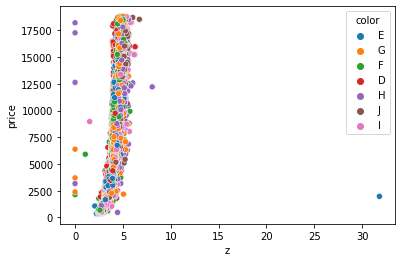

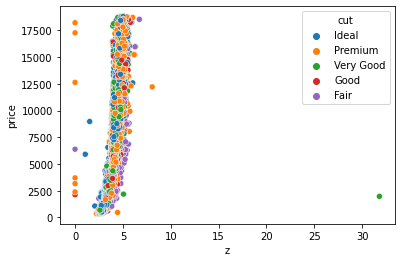

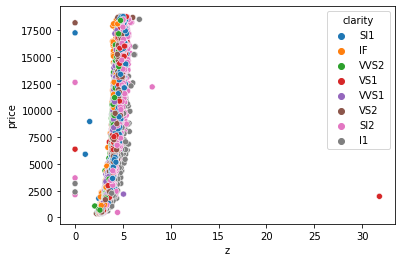

In [28]:
sns.scatterplot(x = df.z, y = df.price, hue = df.color)
plt.show()
sns.scatterplot(x = df.z, y = df.price, hue = df.cut)
plt.show()
sns.scatterplot(x = df.z, y = df.price, hue = df.clarity)
plt.show()

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

- Checking missing values


In [29]:
pd.DataFrame(df.isnull().sum())

,0
carat,0
cut,0
color,0
clarity,0
depth,697
table,0
x,0
y,0
z,0
price,0


- As discussed earlier, we need to check zeroes as well

In [30]:
df[df.x==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [31]:
df[df.y==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [32]:
df[df.z==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [33]:
df.x = df.x.replace(0,np.nan)
df.y = df.y.replace(0,np.nan)
df.z = df.z.replace(0,np.nan)

In [34]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            2
y            2
z            8
price        0
dtype: int64

- Now we can impute them with median

In [35]:
def imputer(col):
    median = df[col].median()
    df[col].fillna(median,inplace = True)

In [36]:
imputer('depth')
imputer('x')
imputer('y')
imputer('z')

In [37]:
pd.DataFrame(df.isnull().sum(), columns = ['NULL Values'])

,NULL Values
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0
price,0


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.20,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.80,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.00,56.00,57.00,59.00,79.00
x,26933.0,5.729769,1.126285,3.73,4.71,5.69,6.55,10.23
y,26933.0,5.733525,1.163989,3.71,4.72,5.70,6.54,58.90
z,26933.0,3.538815,0.717377,1.07,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.00,945.00,2375.00,5356.00,18818.00


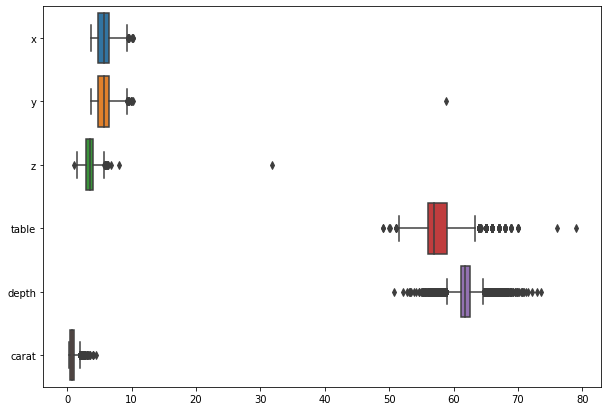

In [39]:
plt.figure(figsize = (10,7))
sns.boxplot(data=df[['x','y','z','table','depth','carat']], orient = 'h');

- Scaling would make the values lie between, -1 and +1. It does not make any sense to have negative values of the data columns.
- At this point of time it is not wise to say about scaling.
- Appropriate would be to build a model, and then comment on scaling

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [40]:
df.select_dtypes(include = ['object']).head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


- Cut color and clarity are the object data types
- Since these are ordinal in nature, we need to code them explicitly

In [41]:
pd.DataFrame(df.cut.value_counts())

,cut
Ideal,10805
Premium,6886
Very Good,6027
Good,2435
Fair,780


- Ordinal Mapping: Fair, Good, Very good, Premium, Ideal (In order of increasing quality)

In [42]:
df.cut = df.cut.replace({'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1})

In [43]:
pd.DataFrame(df.color.value_counts())

,color
G,5653
E,4916
F,4723
H,4095
D,3341
I,2765
J,1440


- Ordinal mapping: D->J from Best to Worst

In [44]:
df.color = df.color.replace({'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1})

In [45]:
pd.DataFrame(df.clarity.value_counts())

,clarity
SI1,6565
VS2,6093
SI2,4564
VS1,4087
VVS2,2530
VVS1,1839
IF,891
I1,364


- ordinal mapping order: IF VVS1 VVS2 VS1 VS2 SI1 SI2 I1 I2 I3 Best to worst

In [46]:
df.clarity = df.clarity.replace({'IF':8,'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3,'SI2':2,'I1':1})

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65,779


In [48]:
pd.DataFrame(df.dtypes, columns = ['Data Type'])

,Data Type
carat,float64
cut,int64
color,int64
clarity,int64
depth,float64
table,float64
x,float64
y,float64
z,float64
price,int64


- Good to proceed and create the model

- Splitting into train and test

In [49]:
X = df.drop('price',axis =1)
Y = df['price']

In [50]:
X_train, X_test, train_labels, test_labels = train_test_split(X,Y, test_size = .3, random_state = 1)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model_sk = LinearRegression()
model_sk.fit(X_train, train_labels)

LinearRegression()

- coefficients and intercept

In [53]:
model_sk.coef_

array([ 1.11319717e+04,  1.07289876e+02,  3.34096299e+02,  5.04502769e+02,
       -8.20351503e+01, -3.00817917e+01, -9.84326705e+02,  1.00110404e+01,
       -4.53052426e+01])

In [54]:
k = 0
for i in X_train.columns:
    print('Coefficient of ',i,' is: ', model_sk.coef_[k])
    k = k+1


print('')
print('The intercept is:',model_sk.intercept_)

Coefficient of  carat  is:  11131.97172130182
Coefficient of  cut  is:  107.28987644346343
Coefficient of  color  is:  334.09629862475083
Coefficient of  clarity  is:  504.5027691971787
Coefficient of  depth  is:  -82.0351502755951
Coefficient of  table  is:  -30.081791696879765
Coefficient of  x  is:  -984.3267054058525
Coefficient of  y  is:  10.011040432151123
Coefficient of  z  is:  -45.305242609685095

The intercept is: 3660.4626049032972


- The coefficients appear to be ambiguous
- Depth has a -ve coefficient, but scatterplt suggests a cloud like distribution- which shpuld give a coefficient near to 0
- The same applies for table
- x has a positiv corelation with price, but we are getting a -ve one.
- The same is happening for z as well
- The intercept has a value of 2975, which suggests, if everything is zero, the price would be 2975, which almost makes no sense, as 0 would mean the diamond doesn't even exist.
- Further exploration is needed.
- Are the coeddicients really representing the universe, or result of statistical fluke

#### Checking scores

In [55]:
print('Model score for train data:', model_sk.score(X_train, train_labels))
print('Model score for test data:',model_sk.score(X_test,test_labels))

Model score for train data: 0.9087174183809242
Model score for test data: 0.9080038175630045


#### Mean Squared error

In [56]:
mse_train = np.mean((model_sk.predict(X_train)-train_labels)**2)
print('MSE for train data is:',mse_train)
mse_test = np.mean((model_sk.predict(X_test)-test_labels)**2)
print('MSE for test data is:',mse_test)
print('\n')
print('RMSE Train:',np.sqrt(mse_train))
print('RMSE test:',np.sqrt(mse_test))

MSE for train data is: 1467435.9518321683
MSE for test data is: 1510966.0280178315


RMSE Train: 1211.3777081621438
RMSE test: 1229.2135811232447


#### Using stats models

In [57]:
import statsmodels.formula.api as smf

In [58]:
data_stats = pd.concat((X_train, train_labels), axis = 1)

In [59]:
model_stats = smf.ols(formula = 'price~ carat + cut + color + clarity + depth + table + x + y + z', data = data_stats).fit()

In [60]:
model_stats.params

Intercept     3660.462605
carat        11131.971721
cut            107.289876
color          334.096299
clarity        504.502769
depth          -82.035150
table          -30.081792
x             -984.326705
y               10.011040
z              -45.305243
dtype: float64

In [61]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.084e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:26:35   Log-Likelihood:            -1.6060e+05
No. Observations:               18853   AIC:                         3.212e+05
Df Residuals:                   18843   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3660.4626    723.109      5.062      0.000    2243.103    5077.822
carat       1.113e+04     93.346    119.255      0.000    1.09e+04    1.13e+04
cut          107.2899      9.739     11.017      0.000      88.201     126.378
color        334.0963      5.480     60.962      0.000     323.354     344.838
clarity      504.5028      5.916     85.283      0.000     492.908     516.098
depth        -82.0352      7.890    -10.397      0.000     -97.500     -66.570
table        -30.0818      4.984     -6.036      0.000     -39.851     -20.313
x           -984.3267     50.690    -19.419      0.000   -1083.684    -884.970
y             10.0110     23.763      0.421      0.674     -36.567      56.589
z            -45.3052     41.512     -1.091      0.275    -126.672      36.062
==============================================================================
Omnibus:                     4008.482   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166200.863
Skew:                           0.083   Prob(JB):                         0.00
Kurtosis:                      17.545   Cond. No.                     6.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The p value for y and z indicates that, the coefficients occurred due to statistical fluke (p>.05 for y and z)

In [62]:
model_stats = smf.ols(formula = 'price~ carat + cut + color + clarity + depth + table + x ', data = data_stats).fit()

In [63]:
model_stats.params

Intercept     3819.128075
carat        11131.898142
cut            107.467442
color          334.046332
clarity        504.447201
depth          -84.704387
table          -29.991729
x            -1002.156737
dtype: float64

In [64]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.680e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:26:42   Log-Likelihood:            -1.6060e+05
No. Observations:               18853   AIC:                         3.212e+05
Df Residuals:                   18845   BIC:                         3.213e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3819.1281    709.321      5.384      0.000    2428.795    5209.461
carat       1.113e+04     93.298    119.316      0.000    1.09e+04    1.13e+04
cut          107.4674      9.733     11.042      0.000      88.390     126.544
color        334.0463      5.480     60.957      0.000     323.305     344.788
clarity      504.4472      5.915     85.281      0.000     492.853     516.041
depth        -84.7044      7.522    -11.260      0.000     -99.449     -69.960
table        -29.9917      4.978     -6.024      0.000     -39.750     -20.234
x          -1002.1567     39.625    -25.291      0.000   -1079.825    -924.488
==============================================================================
Omnibus:                     4009.014   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166315.113
Skew:                           0.083   Prob(JB):                         0.00
Kurtosis:                      17.550   Cond. No.                     6.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The results are a bit contradictory.
- This happens due to multoclllinarity


#### Checking VIF

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [67]:
k = 0
for i in X.columns:
    print('VIF for',i,'is: ', vif[k])
    k = k+1

VIF for carat is:  82.35348832171735
VIF for cut is:  15.008355763026957
VIF for color is:  8.52527887553793
VIF for clarity is:  8.452756345131997
VIF for depth is:  565.7131948750647
VIF for table is:  545.902158911356
VIF for x is:  1135.2003852329688
VIF for y is:  348.0183352189224
VIF for z is:  383.2874142963292


- As can be seen from the vif, the data is not suitable for linear regression
- A lot of multicollinearity stops the model from predicting well

#### Lets check if scaling has any effect over it

In [68]:
from scipy.stats import zscore

In [69]:
df_scaled = df.copy()
df_scaled = df.apply(zscore)

In [70]:
X_scaled = df_scaled.drop('price',axis = 1)
Y_scaled = df_scaled['price']

In [71]:
x_train_scale, x_test_scale, trainl_scale, testl_scale = train_test_split(X_scaled, Y_scaled, test_size = .3, random_state = 1)

In [72]:
model_scale_sk = LinearRegression()
model_scale_sk.fit(x_train_scale, trainl_scale)

LinearRegression()

#### Model score

In [73]:
print('Model score for scaled train data:', model_scale_sk.score(x_train_scale,trainl_scale))
print('Model score for scaled data test:', model_scale_sk.score(x_test_scale, testl_scale))

Model score for scaled train data: 0.9087174183809242
Model score for scaled data test: 0.9080038175630045


In [74]:
k = 0
for i in X_scaled.columns:
    print('Coefficient of ',i,' is:', model_scale_sk.coef_[k])
    k = k+1
print('')
print('Intercept is:', model_scale_sk.intercept_)

Coefficient of  carat  is: 1.3207014802438461
Coefficient of  cut  is: 0.029690429299254948
Coefficient of  color  is: 0.14168352749303686
Coefficient of  clarity  is: 0.20653288650756796
Coefficient of  depth  is: -0.028426428015289443
Coefficient of  table  is: -0.016692703781981007
Coefficient of  x  is: -0.2756042170265853
Coefficient of  y  is: 0.0028968532490366715
Coefficient of  z  is: -0.008079679011382507

Intercept is: 0.000619158508870369


In [75]:
data_scaled = pd.concat([x_train_scale,trainl_scale],axis = 1)

In [76]:
model_stats_scale = smf.ols(formula = 'price~ carat + cut + color + clarity + depth + table + x + y + z ', data = data_scaled).fit()

In [77]:
model_stats_scale.params

Intercept    0.000619
carat        1.320701
cut          0.029690
color        0.141684
clarity      0.206533
depth       -0.028426
table       -0.016693
x           -0.275604
y            0.002897
z           -0.008080
dtype: float64

In [78]:
model_stats_scale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.084e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:27:07   Log-Likelihood:                -4125.0
No. Observations:               18853   AIC:                             8270.
Df Residuals:                   18843   BIC:                             8348.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.002      0.282      0.778      -0.004       0.005
carat          1.3207      0.011    119.255      0.000       1.299       1.342
cut            0.0297      0.003     11.017      0.000       0.024       0.035
color          0.1417      0.002     60.962      0.000       0.137       0.146
clarity        0.2065      0.002     85.283      0.000       0.202       0.211
depth         -0.0284      0.003    -10.397      0.000      -0.034      -0.023
table         -0.0167      0.003     -6.036      0.000      -0.022      -0.011
x             -0.2756      0.014    -19.419      0.000      -0.303      -0.248
y              0.0029      0.007      0.421      0.674      -0.011       0.016
z             -0.0081      0.007     -1.091      0.275      -0.023       0.006
==============================================================================
Omnibus:                     4008.482   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166200.863
Skew:                           0.083   Prob(JB):                         0.00
Kurtosis:                      17.545   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model_stats_scale = smf.ols(formula = 'price~ carat + cut + color + clarity + depth + table + x  ', data = data_scaled).fit()

In [80]:
model_stats_scale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.680e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:27:12   Log-Likelihood:                -4125.7
No. Observations:               18853   AIC:                             8267.
Df Residuals:                   18845   BIC:                             8330.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.002      0.280      0.779      -0.004       0.005
carat          1.3207      0.011    119.316      0.000       1.299       1.342
cut            0.0297      0.003     11.042      0.000       0.024       0.035
color          0.1417      0.002     60.957      0.000       0.137       0.146
clarity        0.2065      0.002     85.281      0.000       0.202       0.211
depth         -0.0294      0.003    -11.260      0.000      -0.034      -0.024
table         -0.0166      0.003     -6.024      0.000      -0.022      -0.011
x             -0.2806      0.011    -25.291      0.000      -0.302      -0.259
==============================================================================
Omnibus:                     4009.014   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166315.113
Skew:                           0.083   Prob(JB):                         0.00
Kurtosis:                      17.550   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The results are similar for the scaled data as well

In [81]:
vif_scaled = [variance_inflation_factor(X_scaled.values, ix) for ix in range(X_scaled.shape[1])] 
k = 0
for i in X_scaled.columns:
    print('VIF for',i,'is: ', vif_scaled[k])
    k = k+1

VIF for carat is:  24.963715237148413
VIF for cut is:  1.494301940960456
VIF for color is:  1.120817341053942
VIF for clarity is:  1.2304009626889634
VIF for depth is:  1.5924186365593191
VIF for table is:  1.5948792938102627
VIF for x is:  48.060763220916726
VIF for y is:  13.864731672538364
VIF for z is:  15.925226236732998


# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations

In [82]:
data = pd.read_csv('cubic_zirconia-1.csv')

In [83]:
data = data.iloc[:,1::]
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Preparing data for dummies

In [84]:
data.x = data.x.replace(0,np.nan)
data.y = data.y.replace(0,np.nan)
data.z = data.z.replace(0,np.nan)

In [85]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            3
y            3
z            9
price        0
dtype: int64

In [86]:
data.depth = data.depth.fillna(data.depth.median())
data.x = data.x.fillna(data.x.median())
data.y = data.y.fillna(data.y.median())
data.z = data.z.fillna(data.z.median())
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [87]:
data.cut.value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

- Need to change the Very Good, as the statsmodels wonn't accept space

In [88]:
data.cut = data.cut.replace('Very Good','verygood')
data.cut.value_counts()

Ideal       10816
Premium      6899
verygood     6030
Good         2441
Fair          781
Name: cut, dtype: int64

In [89]:
data= pd.get_dummies(data = data, columns= ['cut','color','clarity'],drop_first=True)

In [90]:
data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_verygood', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [92]:
x = data.drop('price',axis = 1)
y = data.price

In [93]:
xtrain, xtest, trainlabels, testlabels = train_test_split(x,y,test_size = .3, random_state = 1)

In [94]:
data_train = pd.concat((xtrain,trainlabels),axis = 1)

In [95]:
model_dummies = smf.ols(formula= 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_verygood + color_E +color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 ', data = data_train).fit()

In [96]:
model_dummies.params

Intercept        2379.952630
carat           11409.196431
depth             -63.406449
table             -26.421512
x               -1065.535232
y                  -5.627533
z                 -45.021830
cut_Good          486.273004
cut_Ideal         770.217586
cut_Premium       663.715603
cut_verygood      630.744110
color_E          -199.352525
color_F          -283.292269
color_G          -468.228066
color_H          -968.575310
color_I         -1504.953687
color_J         -2389.063842
clarity_IF       5392.697147
clarity_SI1      3804.556633
clarity_SI2      2853.537679
clarity_VS1      4704.242680
clarity_VS2      4424.699582
clarity_VVS1     5148.254910
clarity_VVS2     5089.742365
dtype: float64

In [97]:
model_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9489.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:            -1.5955e+05
No. Observations:               18876   AIC:                         3.191e+05
Df Residuals:                   18852   BIC:                         3.193e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2379.9526    691.147      3.443      0.001    1025.243    3734.663
carat         1.141e+04     86.776    131.479      0.000    1.12e+04    1.16e+04
depth          -63.4064      7.466     -8.493      0.000     -78.040     -48.773
table          -26.4215      4.969     -5.318      0.000     -36.160     -16.683
x            -1065.5352     47.303    -22.526      0.000   -1158.254    -972.816
y               -5.6275     22.323     -0.252      0.801     -49.382      38.127
z              -45.0218     38.653     -1.165      0.244    -120.785      30.741
cut_Good       486.2730     57.440      8.466      0.000     373.685     598.861
cut_Ideal      770.2176     57.181     13.470      0.000     658.138     882.297
cut_Premium    663.7156     55.082     12.050      0.000     555.750     771.682
cut_verygood   630.7441     55.053     11.457      0.000     522.835     738.653
color_E       -199.3525     30.479     -6.541      0.000    -259.093    -139.612
color_F       -283.2923     30.731     -9.219      0.000    -343.527    -223.058
color_G       -468.2281     30.025    -15.595      0.000    -527.080    -409.376
color_H       -968.5753     32.038    -30.232      0.000   -1031.373    -905.777
color_I      -1504.9537     35.616    -42.255      0.000   -1574.765   -1435.142
color_J      -2389.0638     44.290    -53.942      0.000   -2475.876   -2302.252
clarity_IF    5392.6971     88.035     61.257      0.000    5220.141    5565.253
clarity_SI1   3804.5566     75.898     50.127      0.000    3655.790    3953.323
clarity_SI2   2853.5377     76.321     37.389      0.000    2703.942    3003.134
clarity_VS1   4704.2427     77.385     60.790      0.000    4552.561    4855.925
clarity_VS2   4424.6996     76.259     58.022      0.000    4275.226    4574.173
clarity_VVS1  5148.2549     81.840     62.906      0.000    4987.842    5308.668
clarity_VVS2  5089.7424     79.682     63.876      0.000    4933.559    5245.926
==============================================================================
Omnibus:                     4867.622   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206327.153
Skew:                           0.488   Prob(JB):                         0.00
Kurtosis:                      19.167   Cond. No.                     7.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
coeff = pd.DataFrame(model_dummies.params, columns = ['Coefficients'])

In [101]:
coeff.reset_index(inplace = True)
coeff.sort_values(by = 'Coefficients',ascending=False)

,index,Coefficients
1,carat,11409.196431
17,clarity_IF,5392.697147
22,clarity_VVS1,5148.254910
23,clarity_VVS2,5089.742365
20,clarity_VS1,4704.242680
21,clarity_VS2,4424.699582
18,clarity_SI1,3804.556633
19,clarity_SI2,2853.537679
0,Intercept,2379.952630
8,cut_Ideal,770.217586


# The insights are presented in the report